In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.sankey import Sankey

## Read the data

In [2]:
# read “EstMB MAGdb Archaea-273” MAGs collection data
df = pd.read_excel('../input/pantiukh_SupplTables_S1.xlsx')
# read “Archaea ESTrep-21” MAGs collection data
rep = pd.read_excel('../input/pantiukh_SupplTables_S2.xlsx')

df.head(2) 

,MAG_name,MAG_ID,MAG_quality,Completeness,Contamination,domain,phylum,class,order,family,...,Contigs_number,Average_contigs_length,N50,GC(%),CDS,Hypothetical_protein_numb,Hypothetical_protein_perc,tRNA,crispr,Annotation_depth_perc
0,VPNE3S_metabat.151.fa,EST-A-0001,HQ,99.59,2.23,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,...,26,75196.9,99580,62.67,1995,1114,55.839599,35,1,44.160401
1,VOHZH4_maxbin.056.fa,EST-A-0002,HQ,100.00,3.00,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,...,37,64742.7,629146,58.95,2437,1476,60.566270,38,2,39.433730


In [4]:
# input BGI 
path='/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data/'

# smpls llist
smpls = pd.read_excel(str(path)+'cohort_info/deep_cohort_smpls_list.xlsx', index_col=False)
mtch = pd.read_excel(str(path)+'cohort_info/MB_scode_vcode.xlsx', index_col=False).drop(columns=['Unnamed: 2'])
smpls = smpls.merge(mtch, left_on='smpls', right_on='vkood', how='inner')

bgi = pd.read_csv(str(path)+'cohort_info/stats/ReadsNumb_BGI_fq1.csv', sep=' ')
bgi['sample_name'] = bgi['sample_id'].str.split('_').str[1]
bgi = bgi.sort_values(by=['reads_number_fq1'])
bgi = bgi.merge(smpls, left_on='sample_name', right_on='smpls', how='right')

# read meta data
meta = pd.read_excel(str(path)+'pheno_description/EstMB_phenotype_data.xlsx', index_col=False)
meta = meta.merge(smpls, on='skood', how='inner')
metaC = meta[['gender', 'Age_at_MBsample', 'BMI']]

# abud data
abud = pd.read_csv(str(path)+'abud_tables/Archaea21_SpLevel_CoverM_rep_Illumina.csv')

## Stats

In [24]:
print('NUmber of analised samples:', len(smpls))
print('Number of MAGs:', len(df))
print('Number of species:', len(rep))

NUmber of analised samples: 1878
Number of MAGs: 273
Number of species: 21


In [9]:
# Number of species belonged to the main orders
rep.value_counts('order')

order
Methanomassiliicoccales    18
Methanobacteriales          3
Name: count, dtype: int64

In [ ]:
# Cohort stats
fem = len(meta[meta['gender'] == 1])
male = len(meta[meta['gender'] == 0])
print('Female:', fem,'-', round(fem/len(meta)*100, 2), '%')
print('Male:', male,'-', round(male/len(meta)*100, 2), '%')
print('Mean age:', round(meta['Age_at_MBsample'].mean(),2), 'years')
print('Min-Max age:', meta['Age_at_MBsample'].min(), '-', meta['Age_at_MBsample'].max(), 'years')

Female: 1308 - 69.65 %
Male: 570 - 30.35 %
Mean age: 50.05 years
Min-Max age: 23.0 - 89.0 years


In [23]:
# Reads stats
print('Mean reads per smpl:', round(bgi['reads_number_fq1'].mean(), 0))
print('Reads per smpls SD:', round(bgi['reads_number_fq1'].std(), 0))

Mean reads per smpl: 56072680.0
Reads per smpls SD: 19448868.0


In [31]:
# Functional data stats
print('Annotation depth mean:', round(df['Annotation_depth_perc'].mean(), 2), '%')
print('Annotation depth min-max:', round(df['Annotation_depth_perc'].min(),2), '-', round(df['Annotation_depth_perc'].max(),2), '%')

Annotation depth mean: 43.15 %
Annotation depth min-max: 18.03 - 55.1 %


In [11]:
# Number of species belonged to the Methanobacteriales order genera
df[df['order'] == 'Methanobacteriales'].value_counts('genus')

genus
Methanocatella    83
Name: count, dtype: int64

In [10]:
# Number of species belonged to the Methanomassiliicoccales order genera
df[df['order'] == 'Methanomassiliicoccales'].value_counts('genus')

genus
Methanoprimaticola         118
Methanomethylophilus        41
Methanarcanum               15
Methanomassiliicoccus_A     13
DTU008                       3
Name: count, dtype: int64

In [8]:
# “EstMB MAGdb Archaea-273” MAGs collection completenss and contamination 
print('Median completeness is: ',df['Completeness'].median())
print('Median contamination is: ',df['Contamination'].median())

Median completeness is:  98.05
Median contamination is:  0.52


In [ ]:
# Sp. rep quality
hqm = len(rep[rep['MAG_quality'] == 'HQ'])
mqm = len(rep[rep['MAG_quality'] == 'MQ'])

print('HQ MAGs:', hqm, '-', round(hqm/len(rep)*100, 2), '%')
print('MQ MAGs:', mqm, '-', round(mqm/len(rep)*100, 2), '% \n')

print('Median Completeness:', rep['Completeness'].median(),'%,', 'IQR:', rep['Completeness'].quantile(0.25), '-', rep['Completeness'].quantile(0.75))
print('Median Contamination:', rep['Contamination'].median(),'%,', 'IQR:', rep['Contamination'].quantile(0.25), '-', rep['Contamination'].quantile(0.75))

HQ MAGs: 16 - 76.19 %
MQ MAGs: 5 - 23.81 % 

Median Completeness: 96.85 %, IQR: 91.49 - 98.39
Median Contamination: 0.81 %, IQR: 0.0 - 1.61


In [29]:
# Number of assembled MAGs pe smpl
#abud = abud.set_index('rep_MAG_ID')
abudT = abud.T.drop(columns='unmapped')
sp_cols = [col for col in abudT.columns if col.startswith('EST')]

abudT['total_arch_abud'] = abudT.sum(axis=1)
abudT['arch_sp_numb'] = (abudT[sp_cols] != 0).sum(axis=1)

sp_num = abudT['arch_sp_numb'].value_counts().rename_axis('arch_sp').reset_index(name='counts')
sp_num

,arch_sp,counts
0,0,1422
1,1,556
2,2,362
3,3,114
4,4,34
5,5,19
6,6,5


## Figures

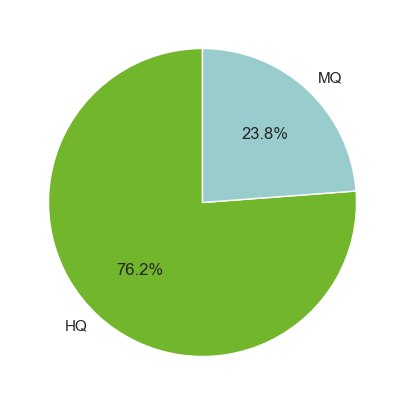

In [71]:
# create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(rep['MAG_quality'].value_counts(), labels=['HQ','MQ'], autopct='%1.1f%%', startangle=90, colors=['#72b62b','#99CCCD'])

plt.savefig('../results/Fig1b_Pie2.svg', bbox_inches='tight')
#plt.savefig('../results/Fig1a_Pie2.png', bbox_inches='tight')

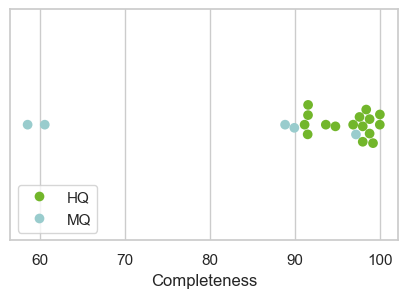

In [72]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
#ax = sns.violinplot(x="Completeness", data=rep, color='#f7fbfa', inner=None)
ax = sns.swarmplot(x="Completeness", data=rep, size=7, hue='MAG_quality', palette=['#72b62b','#99CCCD'])
plt.legend(loc='lower left')

plt.savefig('../results/Fig1c_Compl.svg', bbox_inches='tight')

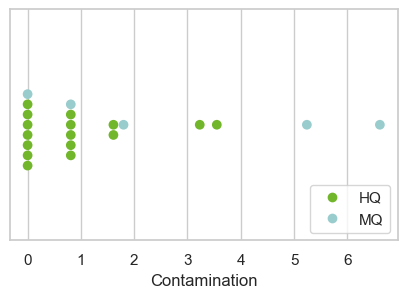

In [74]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
#ax = sns.violinplot(x="Completeness", data=rep, color='#f7fbfa', inner=None)
ax = sns.swarmplot(x="Contamination", data=rep, size=7, hue='MAG_quality', palette=['#72b62b','#99CCCD'])
plt.legend(loc='lower right')

plt.savefig('../results/Fig1d_Cont.svg', bbox_inches='tight')

## Suppl. Figures

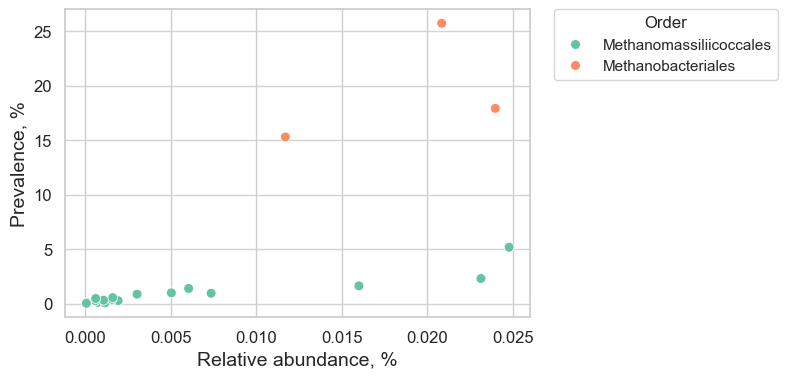

In [100]:
plt.figure(figsize=[6,4])
sns.set_theme(style="whitegrid")

sns.scatterplot(
    data=rep,
    x='Sp_mean_rel-abundance',
    y='Sp_Prevalence',
    hue='order',
    s=50,
    palette='Set2'  # or any palette you like
)
plt.gca().yaxis.grid(True, color="#D7D2D2")
plt.yticks(fontsize=12)
#plt.xticks([0,200,400,600,800,1000,1200], [0,200,400,600,800,1000,1200],fontsize=12)
plt.xlabel('Relative abundance, %', fontsize=14)
plt.ylabel('Prevalence, %', fontsize=14)
plt.legend(title='Order', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('../results/FigS1_Arch_Prev-Abud.svg', bbox_inches='tight')
plt.savefig('../results/FigS1_Arch_Prev-Abud.png', bbox_inches='tight')

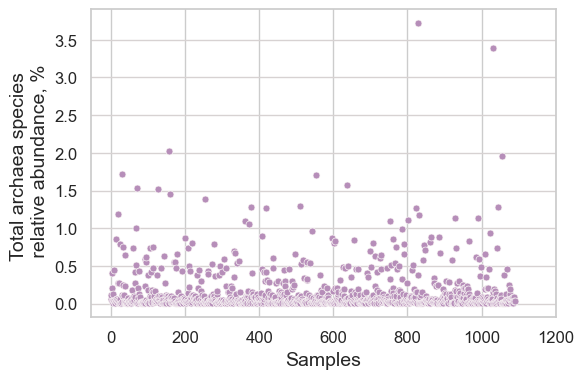

In [83]:
plt.figure(figsize=[6,4])
sns.set_theme(style="whitegrid")

sb = abudT[abudT['total_arch_abud'] > 0]
plt.scatter(sb.index, sb['total_arch_abud'], s=25 , color="#B68EB9", edgecolor="#FAF6F6", linewidth=0.5)
plt.gca().yaxis.grid(True, color="#D7D2D2")
plt.yticks(fontsize=12)
plt.xticks([0,200,400,600,800,1000,1200], [0,200,400,600,800,1000,1200],fontsize=12)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Total archaea species \n relative abundance, %', fontsize=14)

plt.savefig('../results/FigS1_Arch_total_abud.svg', bbox_inches='tight')
plt.savefig('../results/FigS1_Arch_total_abud.png', bbox_inches='tight')

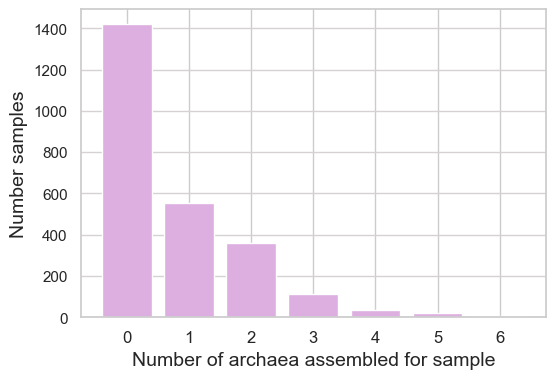

In [82]:
plt.figure(figsize=[6,4])
plt.bar(sp_num['arch_sp'], sp_num['counts'], color="#DDAEE0")
plt.gca().yaxis.grid(True, color="#D7D2D2")
plt.xlabel("Number of archaea assembled for sample", fontsize=14)
plt.ylabel("Number samples", fontsize=14)
#plt.yscale('log')
plt.xticks(fontsize=12)

plt.savefig('../results/FigS2_Arch_per_smpl.svg', bbox_inches='tight')
plt.savefig('../results/FigS2_Arch_per_smpl.png', bbox_inches='tight')

In [33]:
df_Methanomassiliicoccales = df[df['order'] == 'Methanomassiliicoccales']
df_Methanobacteriales = df[df['order'] == 'Methanobacteriales']

print('Median CDS number is: ',df['cds'].median())
print('-- Median CDS number for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['cds'].median())
print('-- Median CDS number for Methanobacteriales is: ',df_Methanobacteriales['cds'].median(), '\n')

print('Median tRNA number is: ',df['tRNA'].median())
print('-- Median tRNA number for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['tRNA'].median())
print('-- Median tRNA number for Methanobacteriales is: ',df_Methanobacteriales['tRNA'].median(), '\n')

print('Median hypotetical proteins percent is: ',df['hyp_perc'].median())
print('-- Median hypotetical proteins percent for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['hyp_perc'].median())
print('-- Median hypotetical proteins percent for Methanobacteriales is: ',df_Methanobacteriales['hyp_perc'].median(), '\n')

Median CDS number is:  1677.5
-- Median CDS number for Methanomassiliicoccales is:  1746.0
-- Median CDS number for Methanobacteriales is:  1540.0 

Median tRNA number is:  42.0
-- Median tRNA number for Methanomassiliicoccales is:  43.0
-- Median tRNA number for Methanobacteriales is:  31.0 

Median hypotetical proteins percent is:  56.14087259157881
-- Median hypotetical proteins percent for Methanomassiliicoccales is:  58.13672111312764
-- Median hypotetical proteins percent for Methanobacteriales is:  50.96085409252669 

